In [1]:
import os
from module.YOLOv3DataGenerator import YOLOv3DataGenerator

In [2]:
CFG = {
    "dataset_dir":  "D:\Github Public\DATASET MANAGER\ObjectDetection_SIMPLE",
    "image_size": (32*8, 32*8),
    "anchor": 3,
    "batch": 2,
    "annotation_dict": {"Face": 0,"Oppai": 1}, 
}

In [3]:
path_list = [os.path.join(root,image) for root, _, files in os.walk(CFG["dataset_dir"], topdown=True) for image in files]
path_list = [path for path in path_list if "_ROI" not in path]
path_list = [path for path in path_list if ".csv" not in path]
path_list = [(path_list[i], path_list[i+1]) for i in range (0,len(path_list),2)]

In [4]:
data_generator = YOLOv3DataGenerator(
    input=path_list,
    annotation_dict=CFG["annotation_dict"],
    image_size=CFG["image_size"], 
    num_anchor=CFG["anchor"], 
    horizontal_flip=True, 
    vertical_flip=True, 
    translate_range=0.2, 
    rotation_range=20,
)

dataset = data_generator.generate_dataset(
    batch_size=CFG["batch"],
    drop_reminder=False,
)

Calculating anchor size ... 3 anchor boxes: [(0.62, 0.62), (0.43, 0.43), (0.5, 0.5)]
CALLING preprocessing function
READ IMAGE ... COMPLETE
READ XML ... COMPLETE
AUGMENTATION: translation -> rotation_complex -> horizontal_flip -> vertical_flip -> padding -> COMPLETE
Generate annotation labels ... COMPLETE


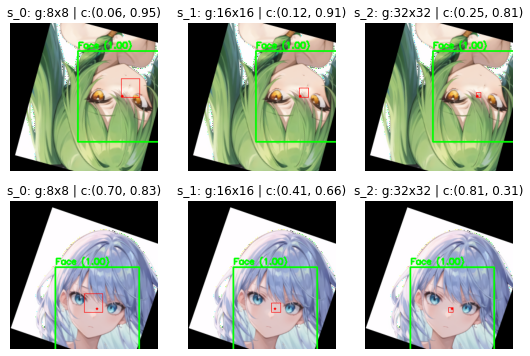

In [5]:
from module.YOLOv3Visualizer import YOLOv3Visualizer
class_map = {}

for key, value in CFG["annotation_dict"].items():
    class_map[value] = key

def calculate_figsize(image_width, image_height, num_row, num_col, percentage=80):
    fig_width = int(image_width * num_col / percentage)
    fig_height = int(image_height * num_row / percentage)
    return (fig_width, fig_height)

figsize = calculate_figsize(CFG["image_size"][0], CFG["image_size"][1], CFG["batch"], 3)
visualizer = YOLOv3Visualizer(class_map)
visualizer.display_batch(dataset, figsize=figsize, show_highlight=True)